In [2]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import imblearn
plt.rcParams['figure.figsize'] = (16, 5)
plt.style.use('fivethirtyeight')

In [3]:
train = pd.read_csv("train_LZdllcl.csv")
test = pd.read_csv("test_2umaH9m.csv")

In [4]:
print("Shape of the Training Data :", train.shape)
print("Shape of the Test Data :", test.shape)

Shape of the Training Data : (54808, 14)
Shape of the Test Data : (23490, 13)


In [5]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [6]:
test.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [7]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [8]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [9]:
train['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [10]:
train['region'].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

In [11]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [12]:
train.describe(include = 'object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


c:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


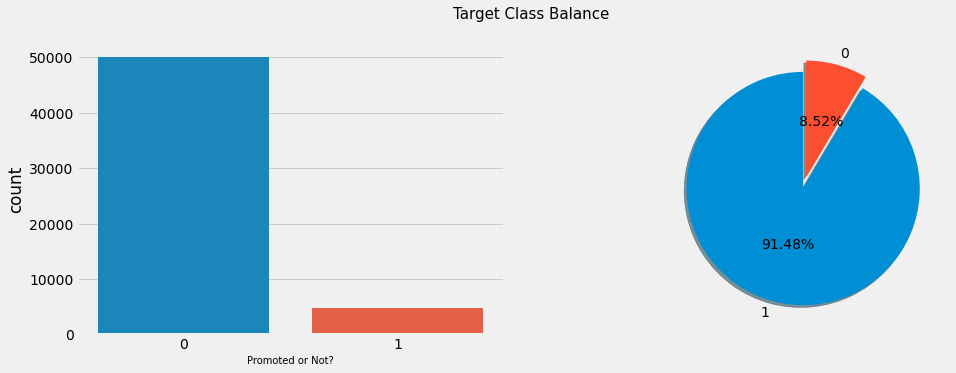

In [13]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
sns.countplot(train['is_promoted'],)

plt.xlabel('Promoted or Not?', fontsize = 10)

plt.subplot(1, 2, 2)
train['is_promoted'].value_counts().plot(kind = 'pie', explode = [0, 0.1], autopct = '%.2f%%', startangle = 90,
                                       labels = ['1','0'], shadow = True, pctdistance = 0.5)
plt.axis('off')

plt.suptitle('Target Class Balance', fontsize = 15)
plt.show()

In [14]:

train_total = train.isnull().sum()
train_percent = ((train.isnull().sum()/train.shape[0])*100).round(2)
test_total = test.isnull().sum()
test_percent = ((test.isnull().sum()/test.shape[0])*100).round(2)
train_missing_data = pd.concat([train_total, train_percent, test_total, test_percent],axis=1,keys=['Train_Total', 'Train_Percent %','Test_Total', 'Test_Percent %'],sort = True)
train_missing_data.style.bar(color = ['gold'])

,Train_Total,Train_Percent %,Test_Total,Test_Percent %
KPIs_met >80%,0,0.000000,0.000000,0.000000
age,0,0.000000,0.000000,0.000000
avg_training_score,0,0.000000,0.000000,0.000000
awards_won?,0,0.000000,0.000000,0.000000
department,0,0.000000,0.000000,0.000000
education,2409,4.400000,1034.000000,4.400000
employee_id,0,0.000000,0.000000,0.000000
gender,0,0.000000,0.000000,0.000000
is_promoted,0,0.000000,nan,nan
length_of_service,0,0.000000,0.000000,0.000000


In [15]:
train['education'] = train['education'].fillna(train['education'].mode()[0])
train['previous_year_rating'] = train['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0])
print("Number of Missing Values Left in the Training Data :", train.isnull().sum().sum())

Number of Missing Values Left in the Training Data : 0


In [16]:
test['education'] = test['education'].fillna(test['education'].mode()[0])
test['previous_year_rating'] = test['previous_year_rating'].fillna(test['previous_year_rating'].mode()[0])
print("Number of Missing Values Left in the Training Data :", test.isnull().sum().sum())

Number of Missing Values Left in the Training Data : 0


In [17]:
train.select_dtypes('number').head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,1,0,49,0
1,65141,1,30,5.0,4,0,0,60,0
2,7513,1,34,3.0,7,0,0,50,0
3,2542,2,39,1.0,10,0,0,50,0
4,48945,1,45,3.0,2,0,0,73,0


c:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


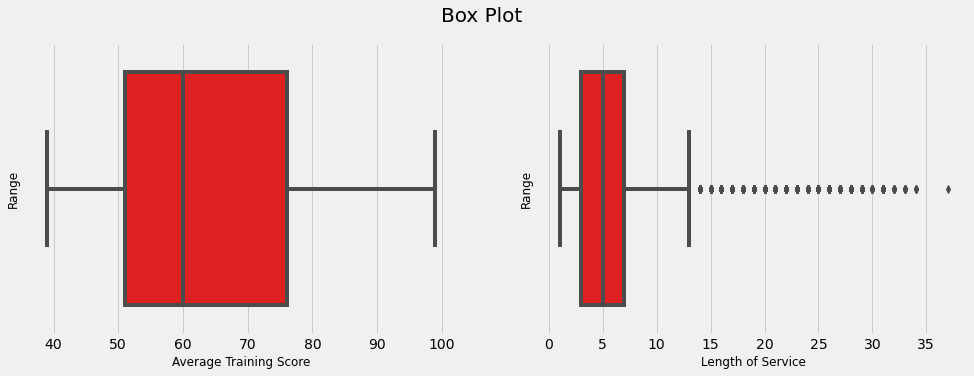

In [18]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.style.use('fivethirtyeight')
plt.subplot(1, 2, 1)
sns.boxplot(train['avg_training_score'], color = 'red')
plt.xlabel('Average Training Score', fontsize = 12)
plt.ylabel('Range', fontsize = 12)
plt.subplot(1, 2, 2)
sns.boxplot(train['length_of_service'], color = 'red')
plt.xlabel('Length of Service', fontsize = 12)
plt.ylabel('Range', fontsize = 12)
plt.suptitle('Box Plot', fontsize = 20)
plt.show()

In [19]:
train = train[train['length_of_service'] > 13]

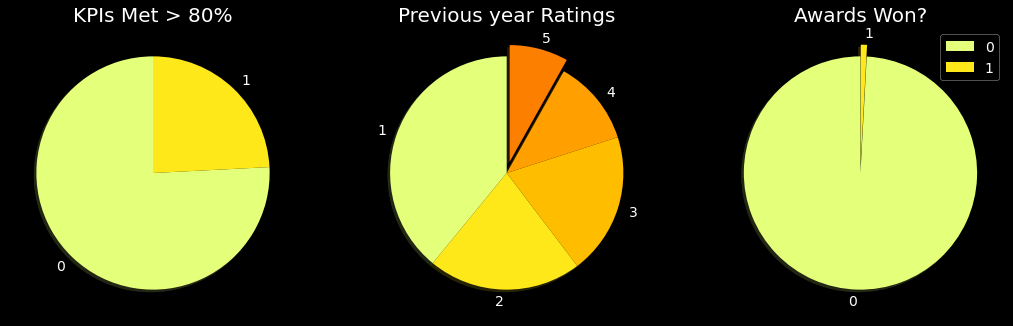

In [20]:
plt.rcParams['figure.figsize'] = (16,5)
plt.style.use('dark_background')

plt.subplot(1, 3, 1)
labels = ['0','1']
sizes = train['KPIs_met >80%'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('KPIs Met > 80%', fontsize = 20)

plt.subplot(1, 3, 2)
labels = ['1', '2', '3', '4', '5']
sizes = train['previous_year_rating'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0, 0, 0, 0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Previous year Ratings', fontsize = 20)

plt.subplot(1, 3, 3)
labels = ['0', '1']
sizes = train['awards_won?'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0,0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Awards Won?', fontsize = 20)


plt.legend()
plt.show()


c:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


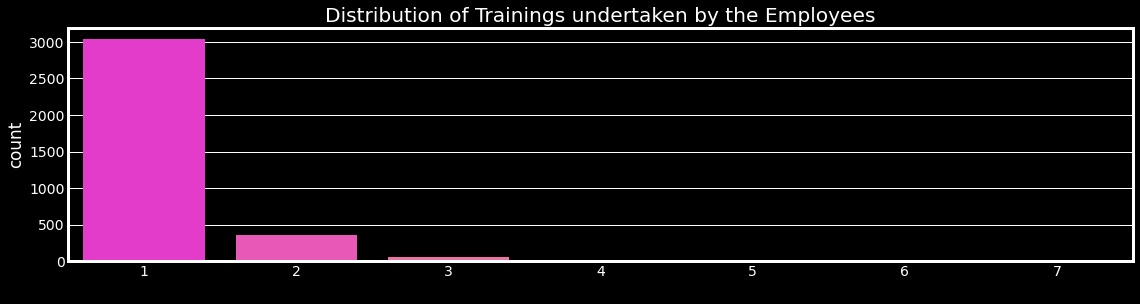

In [21]:
plt.rcParams['figure.figsize'] = (17, 4)
sns.countplot(train['no_of_trainings'], palette = 'spring')
plt.xlabel(' ', fontsize = 14)
plt.title('Distribution of Trainings undertaken by the Employees')
plt.show()

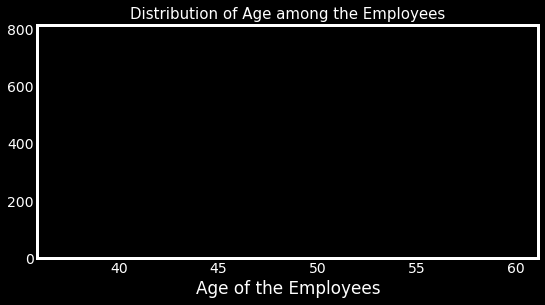

In [22]:
plt.rcParams['figure.figsize'] = (8, 4)
plt.hist(train['age'], color = 'black')
plt.title('Distribution of Age among the Employees', fontsize = 15)
plt.xlabel('Age of the Employees')
plt.grid()
plt.show()

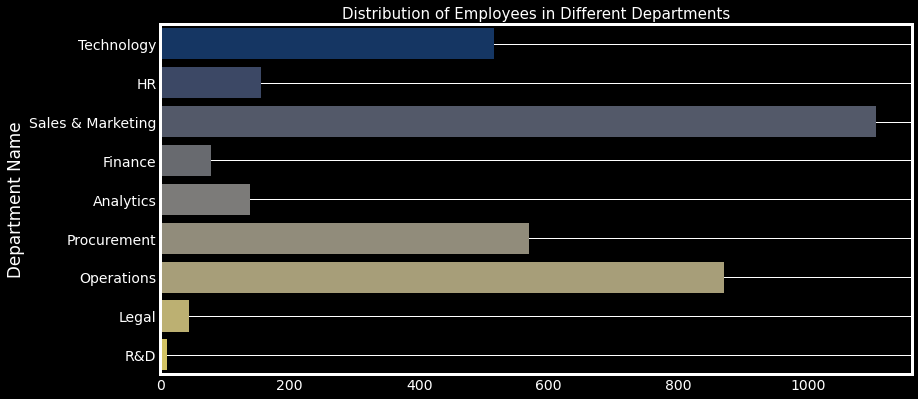

In [23]:
plt.rcParams['figure.figsize'] = (12, 6)
sns.countplot(y = train['department'], palette = 'cividis', orient = 'v')
plt.xlabel('')
plt.ylabel('Department Name')
plt.title('Distribution of Employees in Different Departments', fontsize = 15)
plt.grid()

plt.show()

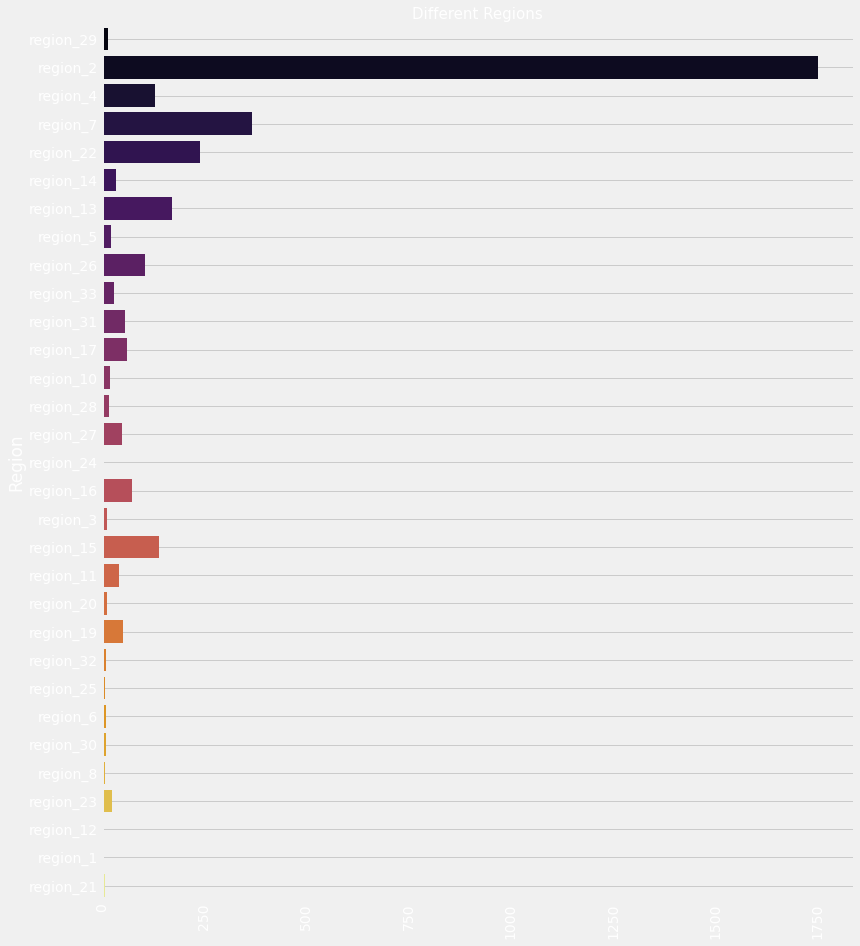

In [24]:
plt.rcParams['figure.figsize'] = (12,15)
plt.style.use('fivethirtyeight')
sns.countplot(y = train['region'], palette = 'inferno', orient = 'v')
plt.xlabel('')
plt.ylabel('Region')
plt.title('Different Regions', fontsize = 15)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

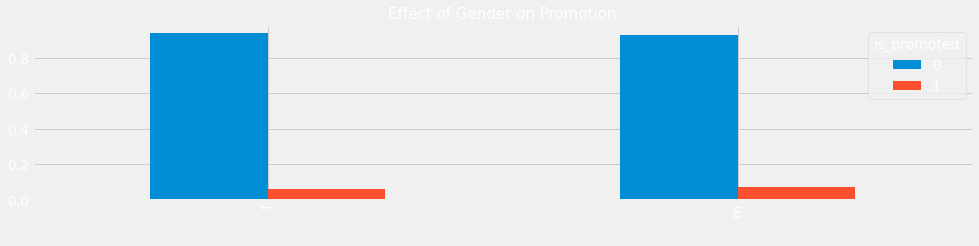

In [25]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15, 3)
x = pd.crosstab(train['gender'], train['is_promoted'])
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = False)
plt.title('Effect of Gender on Promotion', fontsize = 15)
plt.xlabel(' ')
plt.show()

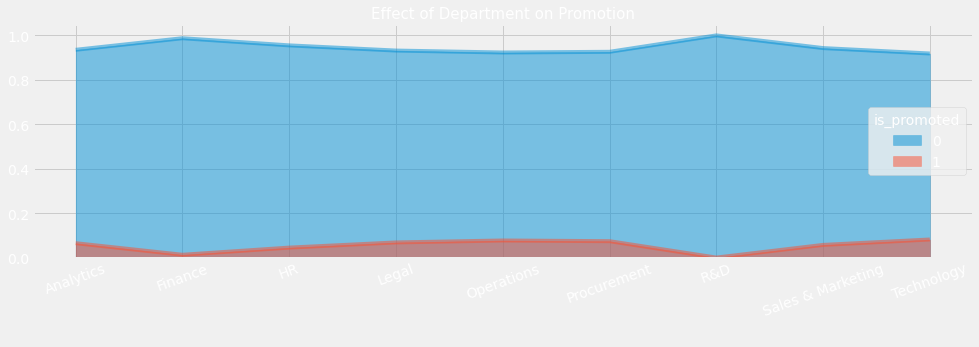

In [26]:
plt.rcParams['figure.figsize'] = (15,4)
x = pd.crosstab(train['department'], train['is_promoted'])
colors = plt.cm.copper(np.linspace(0, 1, 3))
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'area', stacked = False)
plt.title('Effect of Department on Promotion', fontsize = 15)
plt.xticks(rotation = 20)
plt.xlabel(' ')
plt.show()


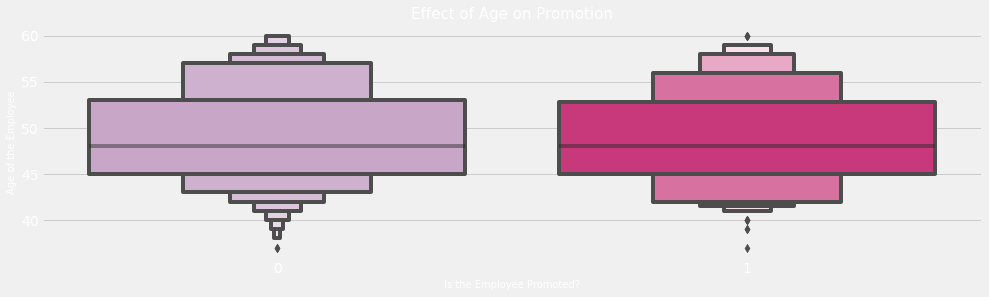

In [27]:
plt.rcParams['figure.figsize'] = (15,4)
sns.boxenplot(train['is_promoted'], train['age'], palette = 'PuRd')
plt.title('Effect of Age on Promotion', fontsize = 15)
plt.xlabel('Is the Employee Promoted?', fontsize = 10)
plt.ylabel('Age of the Employee', fontsize = 10)
plt.show()

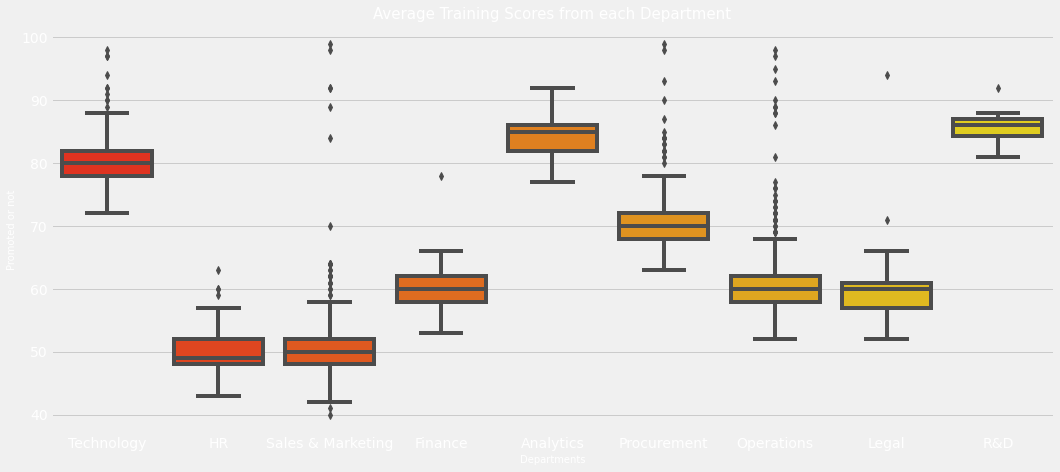

In [28]:

plt.rcParams['figure.figsize'] = (16, 7)
sns.boxplot(train['department'], train['avg_training_score'], palette = 'autumn')
plt.title('Average Training Scores from each Department', fontsize = 15)
plt.ylabel('Promoted or not', fontsize = 10)
plt.xlabel('Departments', fontsize = 10)
plt.show()

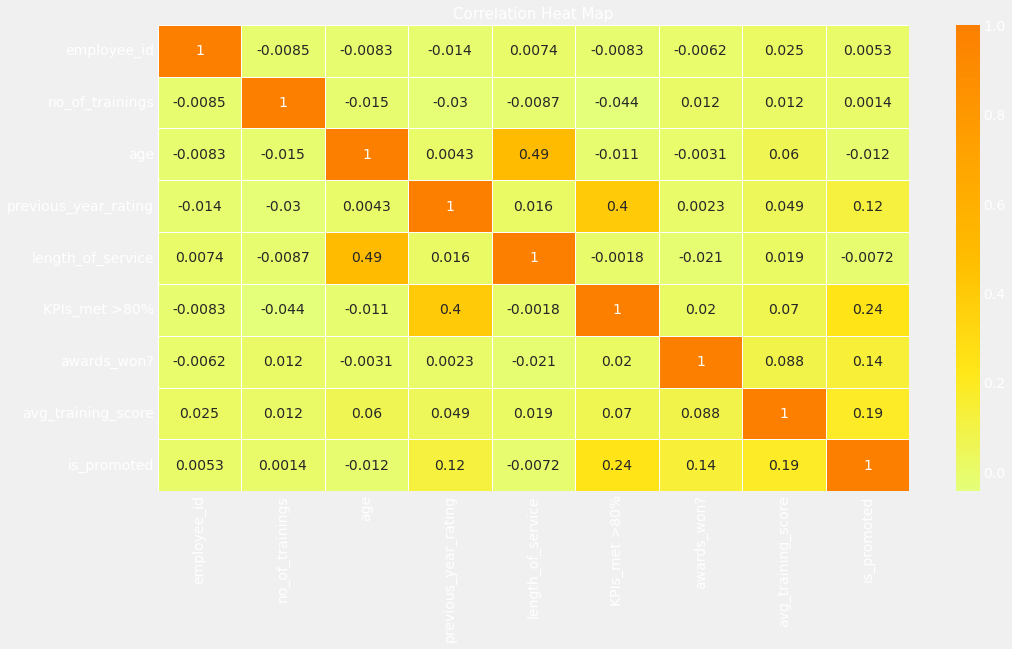

In [29]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(train.corr(), annot = True, linewidth = 0.5, cmap = 'Wistia')
plt.title('Correlation Heat Map', fontsize = 15)
plt.show()

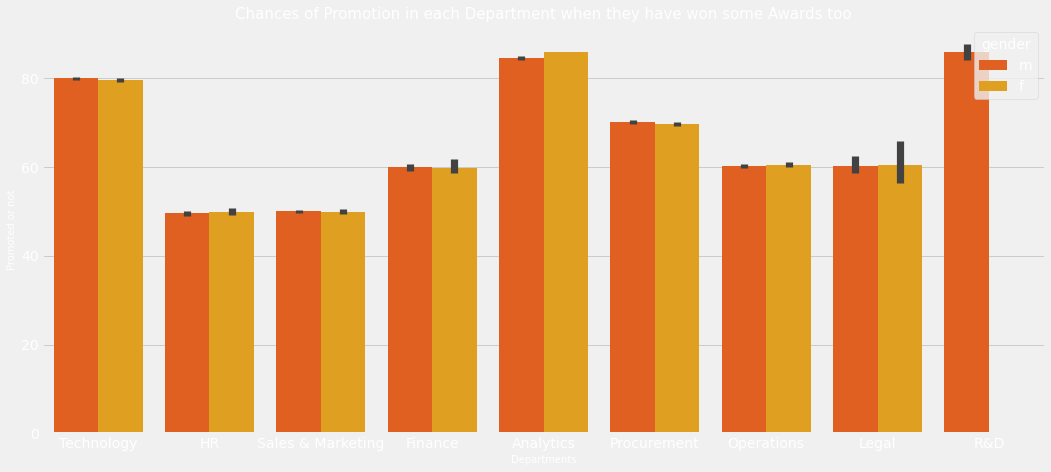

In [30]:
plt.rcParams['figure.figsize'] = (16, 7)
sns.barplot(train['department'], train['avg_training_score'], hue = train['gender'], palette = 'autumn')
plt.title('Chances of Promotion in each Department when they have won some Awards too', fontsize = 15)
plt.ylabel('Promoted or not', fontsize = 10)
plt.xlabel('Departments', fontsize = 10)
plt.show()

In [31]:
train['sum_metric'] = train['awards_won?']+train['KPIs_met >80%'] + train['previous_year_rating']
test['sum_metric'] = test['awards_won?']+test['KPIs_met >80%'] + test['previous_year_rating']

train['total_score'] = train['avg_training_score'] * train['no_of_trainings']
test['total_score'] = test['avg_training_score'] * test['no_of_trainings']

In [32]:
train = train.drop(['recruitment_channel', 'region', 'employee_id'], axis = 1)
test = test.drop(['recruitment_channel', 'region', 'employee_id'], axis = 1)

In [33]:
train[(train['KPIs_met >80%'] == 0) & (train['previous_year_rating'] == 1.0) & 
      (train['awards_won?'] == 0) & (train['avg_training_score'] < 60) & (train['is_promoted'] == 1)]

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score


In [34]:
print("Before Deleting the above two rows :", train.shape)

train = train.drop(train[(train['KPIs_met >80%'] == 0) & (train['previous_year_rating'] == 1.0) & 
      (train['awards_won?'] == 0) & (train['avg_training_score'] < 60) & (train['is_promoted'] == 1)].index)
print("After Deletion of the above two rows :", train.shape)

Before Deleting the above two rows : (3489, 13)
After Deletion of the above two rows : (3489, 13)


In [35]:
train.select_dtypes('object').head()

,department,education,gender
13,Technology,Master's & above,m
42,HR,Bachelor's,m
60,Sales & Marketing,Master's & above,m
74,Sales & Marketing,Bachelor's,m
99,Finance,Master's & above,m


In [36]:
train['education'].value_counts()

Master's & above    1759
Bachelor's          1730
Name: education, dtype: int64

In [37]:
train['education'] = train['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))
test['education'] = test['education'].replace(("Master's & above", "Bachelor's", "Below Secondary"),
                                                (3, 2, 1))

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['department'] = le.fit_transform(train['department'])
test['department'] = le.fit_transform(test['department'])
train['gender'] = le.fit_transform(train['gender'])
test['gender'] = le.fit_transform(test['gender'])

print(train.select_dtypes('object').columns)
print(test.select_dtypes('object').columns)

Index([], dtype='object')
Index([], dtype='object')


In [38]:
train.head(3)

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
13,8,3,1,2,39,3.0,16,0,0,80,0,3.0,160
42,2,2,1,1,59,4.0,26,1,0,52,0,5.0,52
60,7,3,1,1,50,4.0,17,1,0,47,1,5.0,47


In [39]:
y = train['is_promoted']
x = train.drop(['is_promoted'], axis = 1)
x_test = test
print("Shape of the x :", x.shape)
print("Shape of the y :", y.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x : (3489, 12)
Shape of the y : (3489,)
Shape of the x Test : (23490, 12)


In [40]:
from imblearn.over_sampling import SMOTE
oversample= SMOTE()
x_resample, y_resample  = oversample.fit_resample(x, y.values.ravel())
print(x_resample.shape)
print(y_resample.shape)

(6510, 12)
(6510,)


In [41]:
print("Before Resampling :")
print(y.value_counts())

print("After Resampling :")
y_resample = pd.DataFrame(y_resample)
print(y_resample[0].value_counts())

Before Resampling :
0    3255
1     234
Name: is_promoted, dtype: int64
After Resampling :
0    3255
1    3255
Name: 0, dtype: int64


In [42]:

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)
print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Valid :", x_valid.shape)
print("Shape of the y Valid :", y_valid.shape)
print("Shape of the x Test :", x_test.shape)

Shape of the x Train : (5208, 12)
Shape of the y Train : (5208, 1)
Shape of the x Valid : (1302, 12)
Shape of the y Valid : (1302, 1)
Shape of the x Test : (23490, 12)


In [43]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

In [44]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

Training Accuracy : 0.9994239631336406
Testing Accuracy : 0.9523809523809523


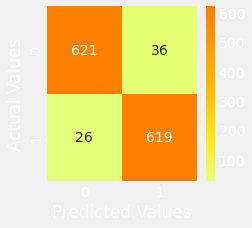

In [45]:
from sklearn.metrics import confusion_matrix, classification_report

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_valid, y_valid))

cm = confusion_matrix(y_valid, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [46]:
cr = classification_report(y_valid, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       657
           1       0.95      0.96      0.95       645

    accuracy                           0.95      1302
   macro avg       0.95      0.95      0.95      1302
weighted avg       0.95      0.95      0.95      1302



In [47]:
import pickle
pickle.dump(model, open('employee_promotion_prediction.pkl', 'wb'))

In [48]:
test.head()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,sum_metric,total_score
0,8,2,1,1,24,3.0,1,1,0,77,4.0,77
1,2,2,0,1,31,3.0,5,0,0,51,3.0,51
2,7,2,1,1,31,1.0,4,0,0,47,1.0,47
3,5,2,0,3,31,2.0,9,0,0,65,2.0,195
4,1,2,1,1,30,4.0,7,0,0,61,4.0,61


In [49]:
train.describe()

,department,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,sum_metric,total_score
count,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.00000,3489.000000
mean,5.381198,2.504156,0.697334,1.168243,49.145027,3.302379,17.629120,0.241903,0.008598,62.071081,0.067068,3.55288,72.591574
std,2.125439,0.500054,0.459478,0.506902,5.423166,1.230116,3.712584,0.428297,0.092342,12.285130,0.250175,1.45818,35.119410
min,0.000000,2.000000,0.000000,1.000000,37.000000,1.000000,14.000000,0.000000,0.000000,40.000000,0.000000,1.00000,40.000000
25%,4.000000,2.000000,0.000000,1.000000,45.000000,3.000000,15.000000,0.000000,0.000000,51.000000,0.000000,3.00000,52.000000
50%,5.000000,3.000000,1.000000,1.000000,48.000000,3.000000,17.000000,0.000000,0.000000,60.000000,0.000000,3.00000,62.000000
75%,7.000000,3.000000,1.000000,1.000000,53.000000,4.000000,19.000000,0.000000,0.000000,71.000000,0.000000,5.00000,79.000000
max,8.000000,3.000000,1.000000,7.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000,7.00000,469.000000


In [50]:
prediction = model.predict(np.array([[2, #department code
                                      3, #masters degree
                                      1, #male
                                      1, #1 training
                                      30, #30 years old
                                      5, #previous year rating
                                      10, #length of service
                                      1, #KPIs met >80%
                                      1, #awards won
                                      95, #avg training score
                                      7, #sum of metric 
                                      700 #total score
                                     ]]))

print("Whether the Employee should get a Promotion : 1-> Promotion, and 0-> No Promotion :",prediction)

Whether the Employee should get a Promotion : 1-> Promotion, and 0-> No Promotion : [1]
